En este Paso 0 buscamos encontrar y difuminar ek fondo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TopHat as th
from PIL import Image
import Binarizacion as ot
import cv2

In [2]:
ruta = 'drive/DRIVE/training/images/39_training.tif'
img = Image.open(ruta).convert("L")
img_array = np.array(img)

In [3]:
def blur_fondo(img_array):
    img_dil = img_array.copy()
    iteraciones = 0
    while np.any(img_dil < 30) or iteraciones < 2:
        kernel_sq = th.crea_kernel(13)
        dilat_im = th.dilatacion(img_dil, kernel_sq)

        _, binary_mask = cv2.threshold(img_dil.astype(np.uint8), 40, 255, cv2.THRESH_BINARY)
        edges = cv2.Canny(binary_mask, 20, 150)
        kernel_sq2 = th.crea_kernel(7)
        dilat_mask = th.dilatacion(edges, kernel_sq2)
        blurred_mask = cv2.GaussianBlur(dilat_mask, (3, 3), 0)


        alpha = blurred_mask.astype(np.float32) / 255  # Normalizar máscara a [0,1]
        img_dil = alpha * dilat_im + (1 - alpha) * img_dil  # Mezcla ponderada
        iteraciones += 1
    print(f'Se realizaron {iteraciones} iteraciones. ')
    return img_dil


Se realizaron 36 iteraciones. 


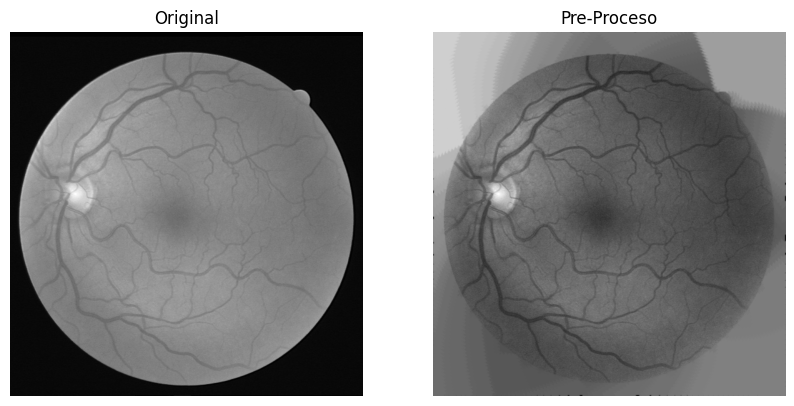

In [4]:
img_dil = blur_fondo(img_array)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img_array, cmap='gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(img_dil, cmap='gray')
ax[1].set_title("Pre-Proceso")
ax[1].axis('off')


plt.show()

In [6]:
ruta = 'DB_Angiograms_134/Database_134_Angiograms/5.pgm'
img = Image.open(ruta).convert("L")
img_array2 = np.array(img)

Se realizaron 10 iteraciones. 


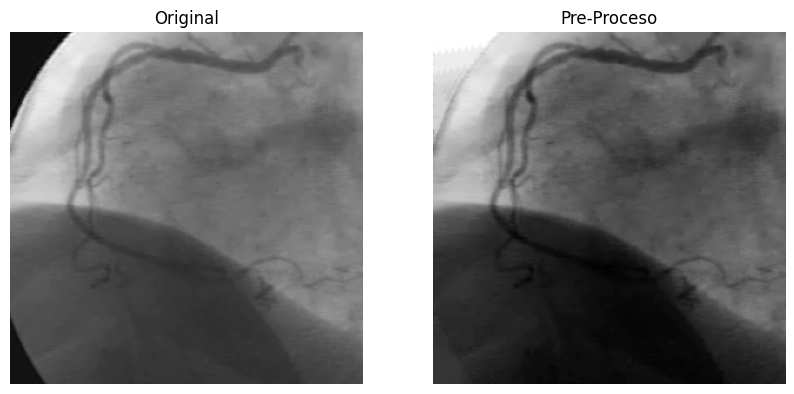

In [7]:
img_dil2 = blur_fondo(img_array2)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img_array2, cmap='gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(img_dil2, cmap='gray')
ax[1].set_title("Pre-Proceso")
ax[1].axis('off')

plt.show()